In [109]:
import numpy as np
import numpy.matlib
import pandas as pd
import matplotlib as mpt
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import statsmodels.api as sm

In [110]:
airbnb = pd.read_csv('cleaned.csv')

### Price

In [111]:
Q1, Q3 = airbnb.price.quantile([0.25, 0.75])
airbnb_price_no = airbnb[ (airbnb.price >= Q1-1.5 * (Q3-Q1)) & (airbnb.price <= Q3+1.5 * (Q3-Q1))]

In [112]:
lm_price_no = sm.OLS(airbnb_price_no.number_of_reviews, sm.add_constant(airbnb_price_no.price)).fit()
#lm_price_no.summary()

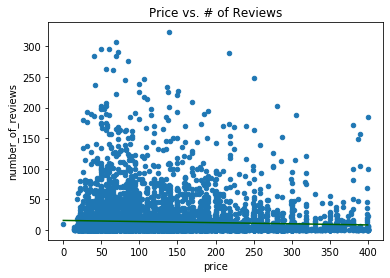

In [113]:
airbnb_price_no.plot('price', 'number_of_reviews', kind = 'scatter').set_title('Price vs. # of Reviews')
xMin = airbnb_price_no.price.min()
xMax= airbnb_price_no.price.max()
X = np.linspace(xMin, xMax, 100)
Y = lm_price_no.params[0] + lm_price_no.params[1] * X
plt.plot(X, Y, color = 'darkgreen')

### Host Listings Count

In [114]:
Q1, Q3 = airbnb.calculated_host_listings_count.quantile([0.25, 0.75])
airbnb_host_no = airbnb[ (airbnb.calculated_host_listings_count >= Q1-1.5 * (Q3-Q1)) & (airbnb.calculated_host_listings_count <= Q3+1.5 * (Q3-Q1))]

In [115]:
airbnb_host_no['calculated_host_listings_count^2'] = airbnb_host_no['calculated_host_listings_count'] * airbnb_host_no['calculated_host_listings_count']

XHost = airbnb_host_no.loc[:, ['calculated_host_listings_count', 'calculated_host_listings_count^2']]
lm_host_no = sm.OLS(airbnb_host_no.number_of_reviews, sm.add_constant(XHost)).fit()
#lm_host_no.summary()

C:\Users\megal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


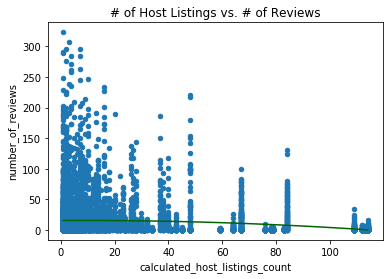

In [116]:
airbnb_host_no.plot('calculated_host_listings_count', 'number_of_reviews', kind = 'scatter').set_title('# of Host Listings vs. # of Reviews')
xMin = airbnb_host_no.calculated_host_listings_count.min()
xMax= airbnb_host_no.calculated_host_listings_count.max()
X = np.linspace(xMin, xMax, 100)
Y = lm_host_no.params[0] + (lm_host_no.params[1] * X) + (lm_host_no.params[2] * X * X)
plt.plot(X, Y, color = 'darkgreen')

### Min Num. Nights

In [117]:
Q1, Q3 = airbnb.minimum_nights.quantile([0.25, 0.75])
airbnb_nights_no = airbnb[ (airbnb.minimum_nights >= Q1-1.5 * (Q3-Q1)) & (airbnb.minimum_nights <= Q3+1.5 * (Q3-Q1))]

In [118]:
airbnb_nights_no['minimum_nights^2'] = airbnb_nights_no['minimum_nights'] * airbnb_nights_no['minimum_nights']

XNights = airbnb_nights_no.loc[:, ['minimum_nights', 'minimum_nights^2']]
lm_nights_no = sm.OLS(airbnb_nights_no.number_of_reviews, sm.add_constant(XNights)).fit()
#lm_nights_no.summary()

C:\Users\megal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


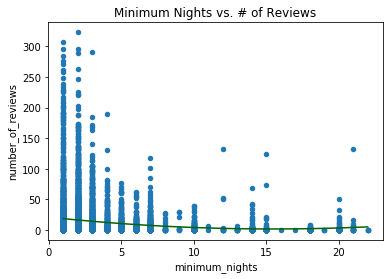

In [119]:
airbnb_nights_no.plot('minimum_nights', 'number_of_reviews', kind = 'scatter').set_title('Minimum Nights vs. # of Reviews')
xMin = airbnb_nights_no.minimum_nights.min()
xMax= airbnb_nights_no.minimum_nights.max()
X = np.linspace(xMin, xMax, 100)
Y = lm_nights_no.params[0] + (lm_nights_no.params[1] * X) + (lm_nights_no.params[2] * X * X)
plt.plot(X, Y, color = 'darkgreen')

### Room Type

Text(0.5, 1.0, 'Room Types Distribution')

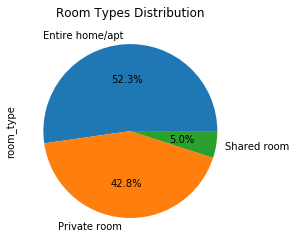

In [120]:
#airbnb.room_type.value_counts().plot(kind='bar')
#plt.title('Frequency Distribution of Room Types')
#plt.ylabel('Number of occurances of room type')
#plt.xlabel('Room Types')

airbnb.room_type.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Room Types Distribution')

In [121]:
RoomGroup = airbnb.groupby(['room_type']).sum()

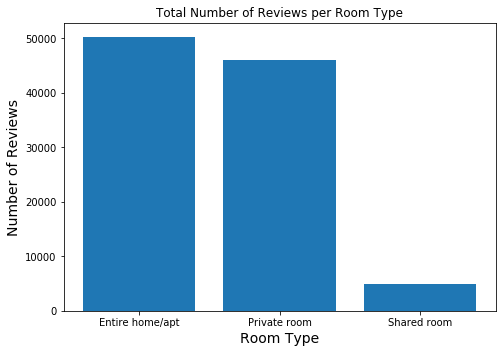

In [122]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(RoomGroup.index, RoomGroup.number_of_reviews)
ax.set_xlabel('Room Type', fontsize=14)
ax.set_ylabel('Number of Reviews', fontsize=14)
plt.title('Total Number of Reviews per Room Type')
plt.show()

### Neighborhood Groups

Text(0.5, 1.0, 'Neighbourhood Group Distribution')

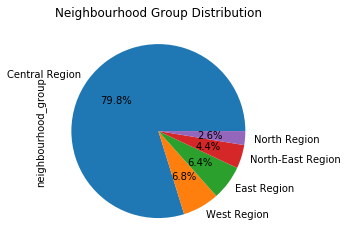

In [123]:
airbnb.neighbourhood_group.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Neighbourhood Group Distribution')

In [124]:
RegionGroup = airbnb.groupby(['neighbourhood_group']).sum()

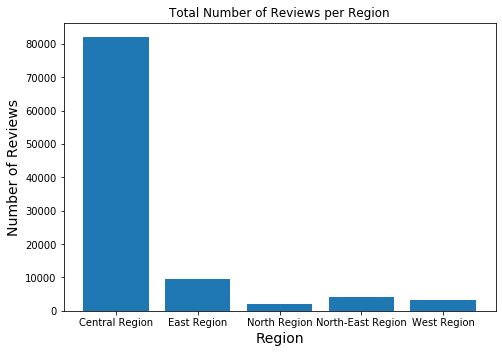

In [125]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(RegionGroup.index, RegionGroup.number_of_reviews)
ax.set_xlabel('Region', fontsize=14)
ax.set_ylabel('Number of Reviews', fontsize=14)
plt.title('Total Number of Reviews per Region')
plt.show()

### Neighborhood

Text(0.5, 0, 'Neighborhoods')

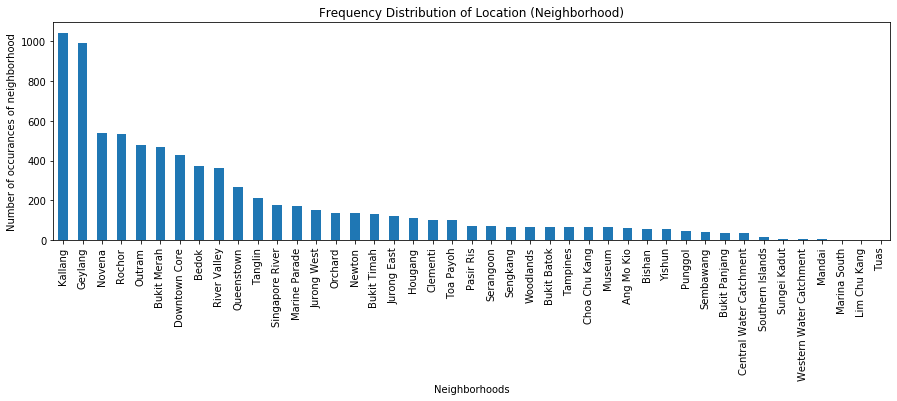

In [126]:
fig = plt.figure()
fig.set_size_inches(15, 4)
fig.add_axes(airbnb.neighbourhood.value_counts().plot(kind='bar'))
plt.title('Frequency Distribution of Location (Neighborhood)')
plt.ylabel('Number of occurances of neighborhood')
plt.xlabel('Neighborhoods')

In [127]:
NeighbourhoodGroup = airbnb.groupby(['neighbourhood']).sum()

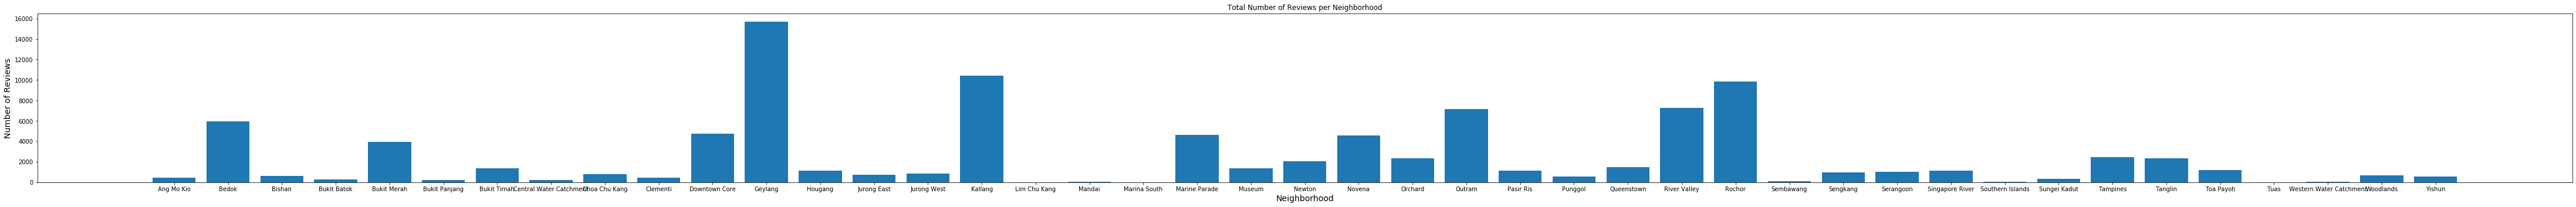

In [128]:
fig = plt.figure()
fig.set_size_inches(60, 4)
ax = fig.add_axes([0,0,1,1])
ax.bar(NeighbourhoodGroup.index, NeighbourhoodGroup.number_of_reviews)
ax.set_xlabel('Neighborhood', fontsize=14)
ax.set_ylabel('Number of Reviews', fontsize=14)
plt.title('Total Number of Reviews per Neighborhood')
plt.show()